In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets

In [16]:
import sklearn.decomposition

sklearn.decomposition.__all__

['DictionaryLearning',
 'FastICA',
 'IncrementalPCA',
 'KernelPCA',
 'MiniBatchDictionaryLearning',
 'MiniBatchNMF',
 'MiniBatchSparsePCA',
 'NMF',
 'PCA',
 'SparseCoder',
 'SparsePCA',
 'dict_learning',
 'dict_learning_online',
 'fastica',
 'non_negative_factorization',
 'randomized_svd',
 'sparse_encode',
 'FactorAnalysis',
 'TruncatedSVD',
 'LatentDirichletAllocation']

In [17]:
import sklearn.linear_model

sklearn.linear_model.__all__

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'QuantileRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SGDOneClassSVM',
 'SquaredLoss',
 'TheilSenRegressor',
 'enet_path',
 'lars_path',
 'lars_path_gram',
 'lasso_path',
 'orthogonal_mp',
 'orthogonal_mp_gram',
 'ridge_regression',
 'RANSACRegressor',
 'PoissonRegressor',
 'GammaRegressor',
 'TweedieRegressor']

In [68]:
data = pd.read_csv('../data/xigua4.0.csv', index_col=0)
data

,密度,含糖率,好瓜
编号,,,
1,0.697,0.460,1
2,0.774,0.376,1
3,0.634,0.264,1
4,0.608,0.318,1
5,0.556,0.215,1
6,0.403,0.237,1
7,0.481,0.149,1
8,0.437,0.211,1
9,0.666,0.091,-1


In [69]:
data = data[['密度', '含糖率', '好瓜']]
data['好瓜'] = data[['好瓜']].replace({-1: 0})
data

,密度,含糖率,好瓜
编号,,,
1,0.697,0.460,1
2,0.774,0.376,1
3,0.634,0.264,1
4,0.608,0.318,1
5,0.556,0.215,1
6,0.403,0.237,1
7,0.481,0.149,1
8,0.437,0.211,1
9,0.666,0.091,0


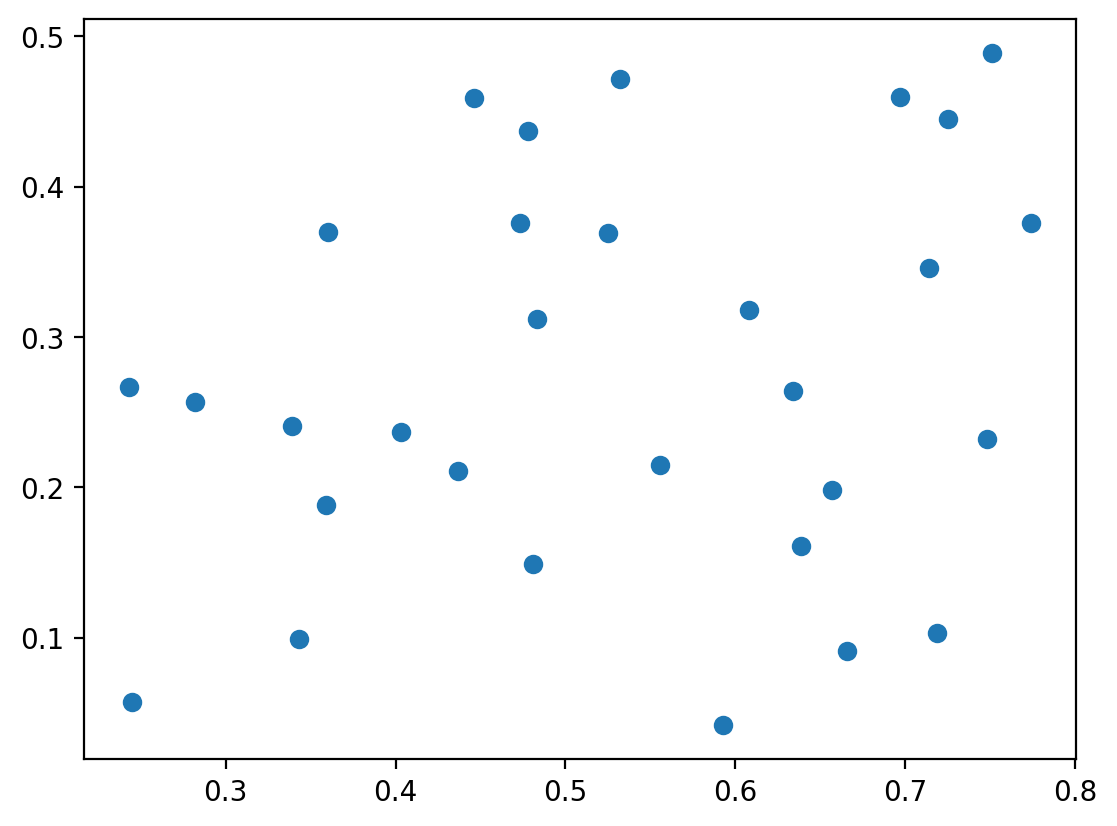

In [70]:
plt.figure(dpi=200)
plt.scatter(data['密度'], data['含糖率'])
plt.show()

0.05009909790368727


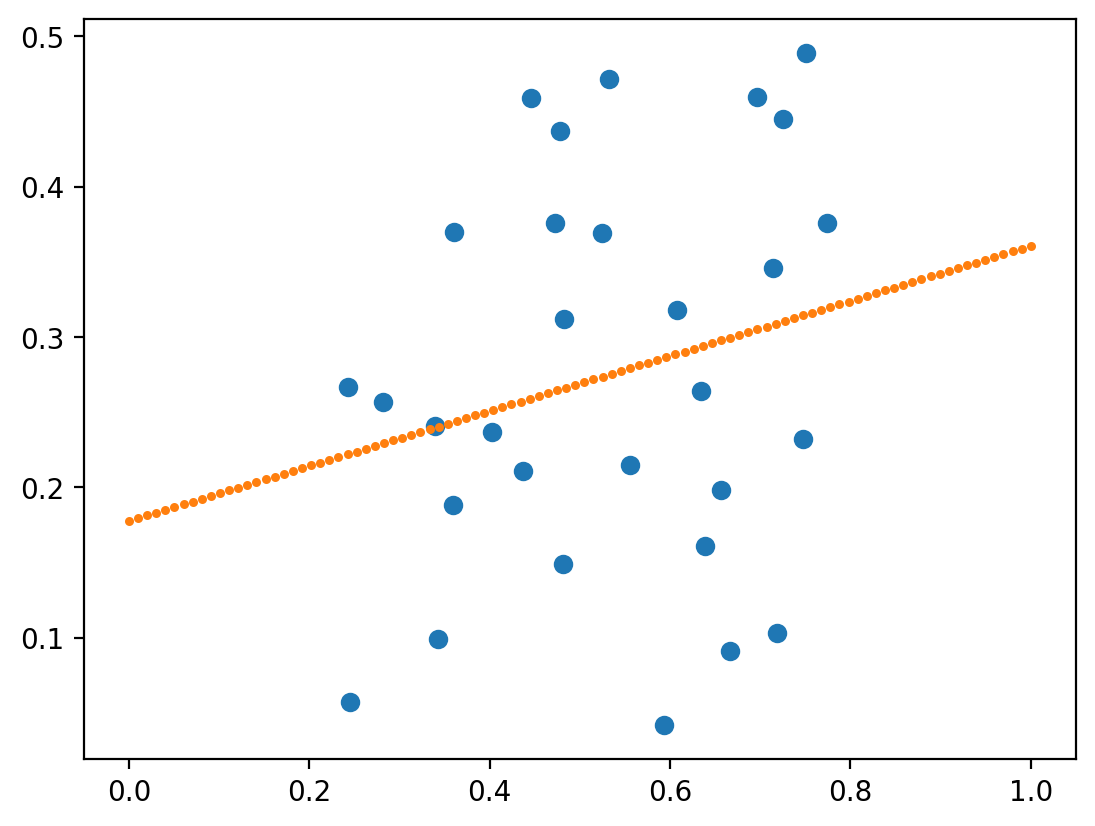

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data[['密度']].to_numpy(), data['含糖率'])
print(model.score(data[['密度']].to_numpy(), data['含糖率']))
data_disp = np.linspace(0, 1, 100)
data_predict = model.predict(data_disp.reshape(1, -1).T)
plt.figure(dpi=200)
plt.scatter(data['密度'], data['含糖率'])
plt.scatter(data_disp, data_predict, s=5)
plt.show()

0.0


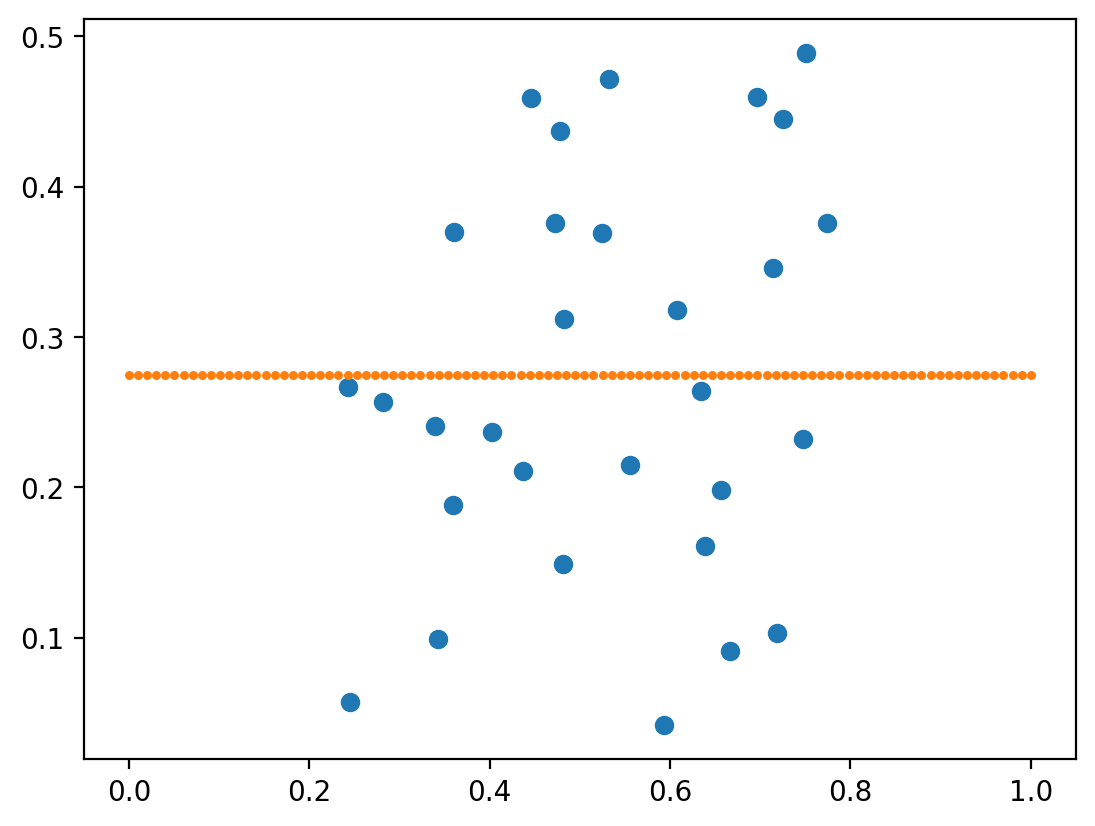

In [76]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(data[['密度']].to_numpy(), data['含糖率'])
print(model.score(data[['密度']].to_numpy(), data['含糖率']))
data_disp = np.linspace(0, 1, 100)
data_predict = model.predict(data_disp.reshape(1, -1).T)
plt.figure(dpi=200)
plt.scatter(data['密度'], data['含糖率'])
plt.scatter(data_disp, data_predict, s=5)
plt.show()

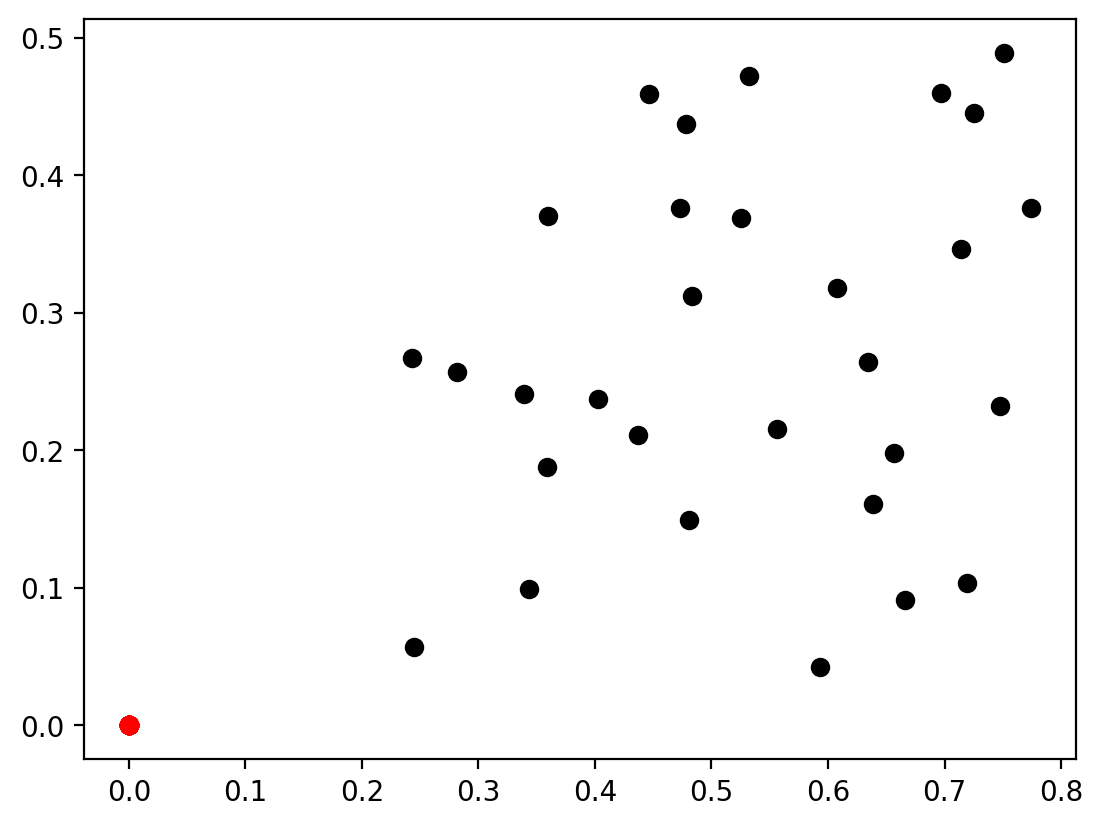

In [78]:
from sklearn.decomposition import *

model = DictionaryLearning(n_components=2)
xigua_trans = model.fit_transform(data[['密度', '含糖率']])
plt.figure(dpi=200)
plt.scatter(data['密度'], data['含糖率'], c='Black')
plt.scatter(xigua_trans[:, 0], xigua_trans[:, 1], c='Red')
plt.show()

In [79]:
data = pd.read_csv('../data/xigua3.0.csv', index_col=0)
data

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
编号,,,,,,,,,
1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否


In [80]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
data2 = pd.DataFrame(encoder.fit_transform(data))
data2 = (data2 - data2.min()) / (data2.max() - data2.min())
data2_train = data2.iloc[:, :-1]
data2_train

,0,1,2,3,4,5,6,7
0,1.0,1.0,0.5,0.5,0.0,0.0,0.8750,1.0000
1,0.0,1.0,0.0,0.5,0.0,0.0,1.0000,0.9375
2,0.0,1.0,0.5,0.5,0.0,0.0,0.6250,0.6875
3,1.0,1.0,0.0,0.5,0.0,0.0,0.5625,0.8125
4,0.5,1.0,0.5,0.5,0.0,0.0,0.4375,0.5625
5,1.0,0.5,0.5,0.5,1.0,1.0,0.2500,0.6250
6,0.0,0.5,0.5,1.0,1.0,1.0,0.3750,0.3125
7,0.0,0.5,0.5,0.5,1.0,0.0,0.3125,0.5000
8,0.0,0.5,0.0,1.0,1.0,0.0,0.8125,0.1250
9,1.0,0.0,1.0,0.5,0.5,1.0,0.0000,0.7500


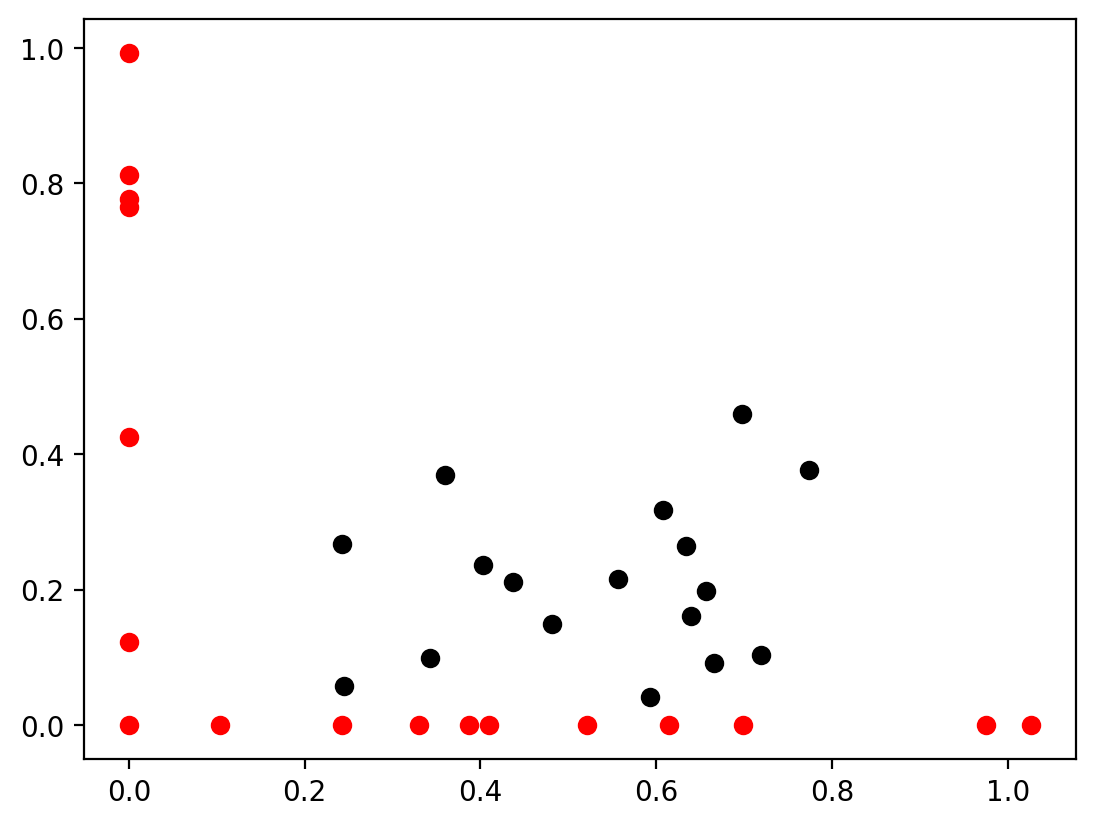

In [81]:
from sklearn.decomposition import *

model = DictionaryLearning(n_components=2, n_jobs=-1, max_iter=10000)
xigua_trans = model.fit_transform(data2_train)
plt.figure(dpi=200)
plt.scatter(data['密度'], data['含糖率'], c='Black')
plt.scatter(xigua_trans[:, 0], xigua_trans[:, 1], c='Red')
plt.show()